<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [2]:
import numpy as np

In [7]:
# Define input and output
X = np.array(([0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [0, 1, 0],
              [1, 0, 0],
              [1, 1, 1],
              [0, 0, 0]), dtype = float)

y = np.array(([0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]), dtype = float)

In [8]:
class MultilayerPerceptron:
    def __init__(self):
        # Set up architecture
        self.inputs = 3
        self.hiddenNodes = 4
        self.output = 1
        
        # Initialize Weights
        # 3x4 for: Inputs --> Hidden Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
        
        # 4x1 for: Hidden Layer --> Output
        self.weights2 = np.random.rand(self.hiddenNodes, self.output)
        
    # Define activation function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Slope of activation function
    def sigmoidPrime(self, x):
        sx = self.sigmoid(x)
        return sx * (1 - sx)
    
    # Feed forward / prediction method
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka 'predict'
        """
        
        # Weighted sum of inputs
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of Weighted Sums
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        # Next layer
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final node - activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output
    
    def backward(self, X, y, y_pred):
        """
        Back propagate through the network
        """
        
        # Error in output
        self.output_error = y - y_pred
        
        
        # hidden --> Output
        # Apply Derivative of Sigmoid to error
        self.output_delta = self.output_error * self.sigmoidPrime(y_pred)
        
        # z2 Error
        self.z2_error = self.output_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Update weights
        self.weights1 += X.T.dot(self.z2_delta)
        # Adjust second set of weights
        self.weights2 += self.activated_hidden.T.dot(self.output_delta)
        
    def train(self, X, y):
        output = self.feed_forward(X)
        self.backward(X, y, output)

In [11]:
# Train my 'net
nn = MultilayerPerceptron()

# Set number of Epochs
for i in range(100000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 10000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.84060962]
 [0.8728097 ]
 [0.8564305 ]
 [0.83216848]
 [0.80723623]
 [0.88213311]
 [0.7825763 ]]
Loss: 
 0.3141891293154428
+---------EPOCH 2---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.72794879]
 [0.75666393]
 [0.7408808 ]
 [0.72102932]
 [0.70062363]
 [0.76518521]
 [0.68326912]]
Loss: 
 0.26801151313942123
+---------EPOCH 3---------+
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Actual Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output: 
 [[0.64320363]
 [0.66252191]
 [0.65141543]
 [0.63785   ]
 [0.62435046]
 [0.66813223]
 [0.61373475]]
Loss: 
 0.24920711410330018
+---------EPOC

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Make it into a Binary Classification Problem

In [6]:
y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [7]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

In [8]:
class MNIST_Classifier:
    # Initialize
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 784
        self.hiddenNodes1 = 128
        self.hiddenNodes2 = 128
        self.output = 1

        # Initial Weights
        # 784x128 Matrix Array for: input --> First Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes1)
        # 128x128 Matrix Array for: First Layer --> Second Layer
        self.weights2 = np.random.rand(self.hiddenNodes1, self.hiddenNodes2)
        # 128x1 Matrix for: Second Layer --> Output
        self.weights3 = np.random.rand(self.hiddenNodes2, self.output)
        
    # Define activation function
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    # Slope of activation function
    def sigmoidPrime(self, s):
        sx = self.sigmoid(s)
        return sx * (1 - sx)
    
    # Feed forward / prediction method
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka 'predict'
        """
        
        # Input --> First Layer
        # Weighted sum of inputs
        self.hidden_sum1 = np.dot(X, self.weights1)
        # Activations of Weighted Sums
        self.activated_hidden1 = self.sigmoid(self.hidden_sum1)
        
        # First Layer --> Second Layer
        # Weighted Sum of Inputs
        self.hidden_sum2 = np.dot(self.activated_hidden1, self.weights2)
        # Activation of weighted sum
        self.activated_hidden2 = self.sigmoid(self.hidden_sum2)
        
        # Second Layer --> Output
        # Weighted sum
        self.output_sum = np.dot(self.activated_hidden2, self.weights3)
        # Activation output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, y_pred):
        """
        Back propagate through the network
        """
        
        # Second Layer <-- Output
        # Error in output
        self.output_error = y - y_pred
        # Delta in output
        self.output_delta = self.output_error * self.sigmoidPrime(y_pred)
        
        # First Layer <-- Second Layer
        # Error in Second Layer
        self.z3_error = self.output_delta.dot(self.weights3.T)
        # Delta in Second Layer
        self.z3_delta = self.z3_error * self.sigmoidPrime(self.activated_hidden2)
        
        # Input <-- First Layer
        # Error in First Layer
        self.z2_error = self.z3_delta.dot(self.weights2.T)
        # Delta in First Layer
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden1)
        
        
        # Update weights
        self.weights1 += X.T.dot(self.z2_delta)
        self.weights2 += self.activated_hidden1.T.dot(self.activated_hidden2)
        self.weights3 += self.activated_hidden2.T.dot(self.activated_output)
        
    def train(self, X, y):
        y_pred = self.feed_forward(X)
        self.backward(X, y, y_pred)

In [11]:
# Train my 'net
classifier = MNIST_Classifier()

# Set number of Epochs
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Actual Output: \n', y_train)
        print('Predicted Output: \n', str(classifier.feed_forward(x_train)))
        # print("Loss: \n", str(np.mean(np.square(y_train - nn.feed_forward(x_train)))))
    classifier.train(x_train, y_train)

+---------EPOCH 1---------+
Actual Output: 
 [0. 1. 0. ... 0. 0. 0.]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


KeyboardInterrupt: 

## Using Tensorflow

In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

tf.__version__

'1.14.0'

In [13]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
import matplotlib.pyplot as plt

In [15]:
# plt.imshow(x_train[0])
# print(x_train[0])

In [16]:
# Normalize Data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [17]:
# Define Architecture #
model = tf.keras.models.Sequential()

# Flatten Data - Input Layer
model.add(tf.keras.layers.Flatten())

# Two hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
# Training Params
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2638 - acc: 0.9234
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1063 - acc: 0.9669
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0729 - acc: 0.9772
Epoch 4/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0545 - acc: 0.9820
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0406 - acc: 0.9866


In [20]:
# Validation loss and accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.0874 - acc: 0.9753
0.08740958167514763 0.9753


In [21]:
predictions = model.predict([x_test])

In [22]:
print(predictions)

[[5.3896154e-12 2.5152277e-10 1.0038619e-07 ... 9.9999940e-01
  2.8981500e-12 4.4549560e-09]
 [3.9869453e-12 2.2343040e-06 9.9999774e-01 ... 1.6769293e-10
  1.7175587e-09 6.8248608e-15]
 [2.9589642e-10 9.9990249e-01 5.2601177e-07 ... 8.0684724e-05
  1.5448637e-05 7.3759431e-08]
 ...
 [2.2528226e-11 8.4053449e-09 5.4162658e-10 ... 2.4321464e-06
  5.6032189e-08 1.6160149e-05]
 [7.4440822e-09 2.0850324e-10 1.0865061e-10 ... 2.2994313e-10
  1.6298489e-05 3.7692082e-11]
 [5.0689980e-08 1.3212002e-08 2.4225702e-07 ... 5.1335741e-12
  3.1657140e-07 5.8790275e-09]]


In [25]:
# Take the most probable output
np.argmax(predictions[150])

9

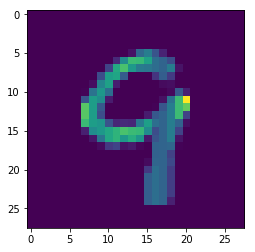

In [26]:
plt.imshow(x_test[150])

In [ ]:
# # Pickle
# model.save('num_reader.model')
# new_model = tf.keras.models.load_model('num_reader.model')

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?